In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

np.random.seed(42)
tf.random.set_seed(42)

print("NumPy:", np.__version__, "TensorFlow:", tf.__version__)

NumPy: 2.0.2 TensorFlow: 2.19.0


Load the MNIST dataset

In [ ]:
(train_data, train_target), (test_data, test_target) = mnist.load_data()

x_train = train_data.astype("float32") / 255.0
x_test = test_data.astype("float32") / 255.0
y_train = to_categorical(train_target)
y_test = to_categorical(test_target)

Visualize the dataset

Target labels:  [4 0 0 8 3 6 3 1 6 4]


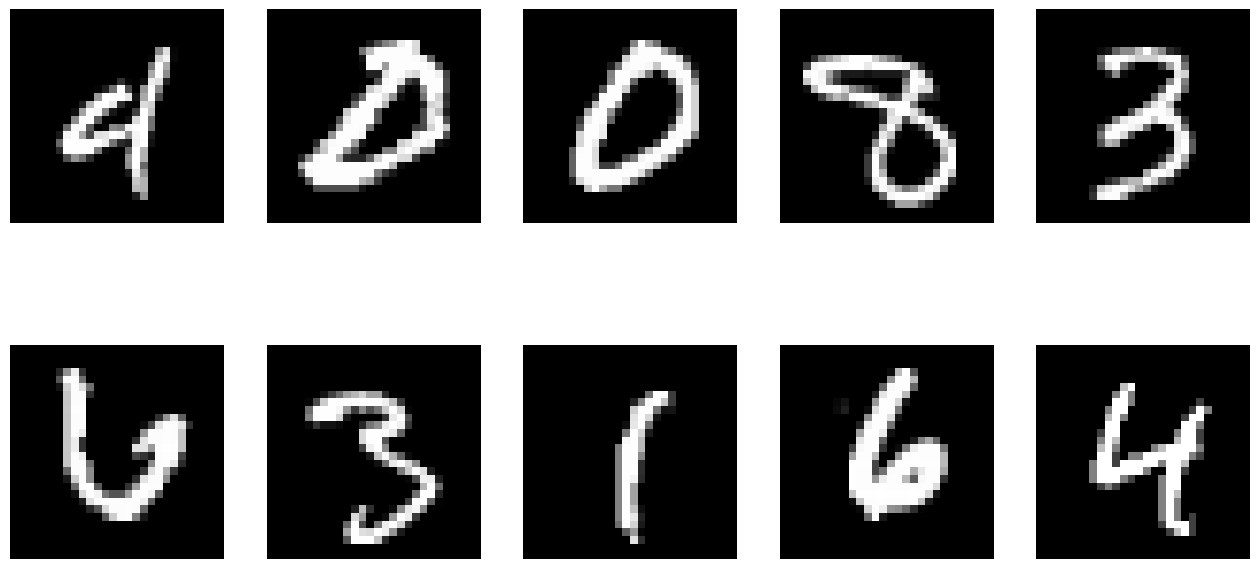

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, x_train.shape[0], 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[random_numbers[idx]],cmap='gray')
    ax.axis("off")
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [ ]:
#baseline model builder
def build_mlp(units=(128,64), dropout=0.2, lr=1e-3):
  model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(units[0], activation="relu"),
      layers.Dropout(dropout),
      layers.Dense(units[1], activation="relu"),
      layers.Dropout(dropout),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=lr),
      loss="categorical_crossentropy",
      metrics=["accuracy"]
  )
  return model

#build and view summary
model = build_mlp()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7480 - loss: 0.8179 - val_accuracy: 0.9580 - val_loss: 0.1508
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9318 - loss: 0.2285 - val_accuracy: 0.9648 - val_loss: 0.1162
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9510 - loss: 0.1709 - val_accuracy: 0.9725 - val_loss: 0.0935
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9581 - loss: 0.1378 - val_accuracy: 0.9740 - val_loss: 0.0868
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9641 - loss: 0.1176 - val_accuracy: 0.9768 - val_loss: 0.0774
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9682 - loss: 0.1016 - val_accuracy: 0.9763 - val_loss: 0.0759
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9723 - loss: 0.0884 - val_accuracy: 0.9772 - val_loss: 0.0760
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9729 - loss: 0.0857 - val_accuracy: 0.

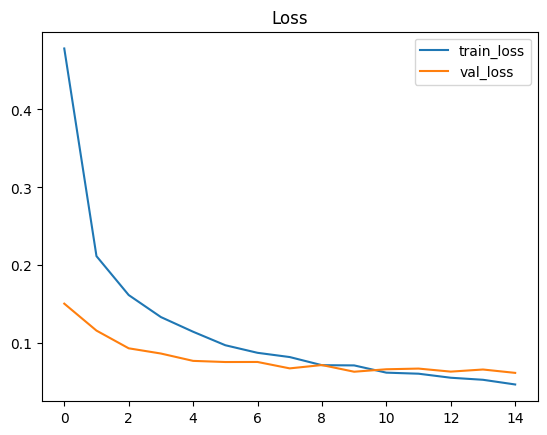

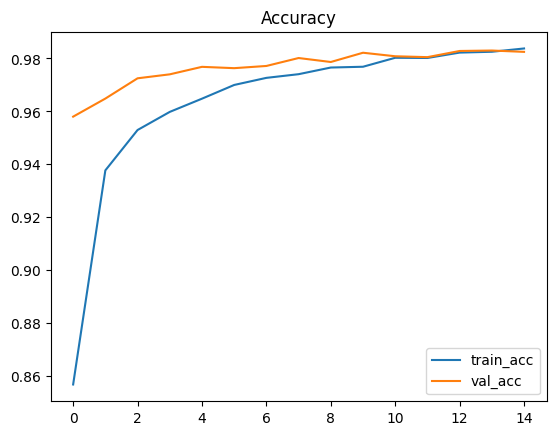

Baseline test accuracy: 97.87% (loss: 0.0713)


In [ ]:
#train baseline
epochs = 15
batch_size = 128
es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[es],
    verbose=1
)

#plots
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title("Loss"); plt.show()

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title("Accuracy"); plt.show()

#baseline evaluation
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline test accuracy: {acc*100:.2f}% (loss: {loss:.4f})")

In [ ]:
#(a) Improve test accuracy - hyperparameter tuning

#quick hyperparameter sweep
configs = [
    {"units": (128,64), "dropout": 0.2, "lr": 1e-3, "epochs":12, "batch":128},
    {"units": (256,128), "dropout": 0.2, "lr": 1e-3, "epochs":15, "batch":128},
    {"units": (512,256), "dropout": 0.3, "lr": 5e-4, "epochs":18, "batch":128},
    {"units": (384,192), "dropout": 0.25, "lr": 1e-3, "epochs":15, "batch":64},
]

results = []
for cfg in configs:
  print("\nTesting config:", cfg)
  m = build_mlp(units=cfg["units"], dropout=cfg["dropout"], lr=cfg["lr"])
  es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
  m.fit(x_train, y_train, validation_split=0.1, epochs=cfg["epochs"], batch_size=cfg["batch"], callbacks=[es], verbose=0)
  loss, acc = m.evaluate(x_test, y_test, verbose=0)
  print("Test acc:", round(acc*100, 2), "%")
  results.append((cfg, acc, loss))

#show results as DataFrame
df = pd.DataFrame([{"units": r[0]["units"], "dropout": r[0]["dropout"], "lr":r[0]["lr"],
                    "batch": r[0]["batch"], "epochs": r[0]["epochs"], "test_acc": r[1], "test_loss": r[2]} for r in results])
display(df.sort_values("test_acc", ascending=False))

best = max(results, key=lambda x: x[1])
print("Best config:", best[0], "Test acc:", round(best[1]*100,2), "%")

#retrain best model
best_cfg = best[0]
best_model = build_mlp(units=best_cfg["units"], dropout=best_cfg["dropout"], lr=best_cfg["lr"])
best_model.fit(x_train, y_train, validation_split=0.1, epochs=best_cfg["epochs"], batch_size=best_cfg["batch"], callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)], verbose=1)
best_loss, best_acc = best_model.evaluate(x_test, y_test, verbose=0)
print("Retrained best model test acc:", round(best_acc*100,2), "%")


Testing config: {'units': (128, 64), 'dropout': 0.2, 'lr': 0.001, 'epochs': 12, 'batch': 128}
Test acc: 97.78 %

Testing config: {'units': (256, 128), 'dropout': 0.2, 'lr': 0.001, 'epochs': 15, 'batch': 128}
Test acc: 97.95 %

Testing config: {'units': (512, 256), 'dropout': 0.3, 'lr': 0.0005, 'epochs': 18, 'batch': 128}
Test acc: 98.16 %

Testing config: {'units': (384, 192), 'dropout': 0.25, 'lr': 0.001, 'epochs': 15, 'batch': 64}
Test acc: 98.17 %


,units,dropout,lr,batch,epochs,test_acc,test_loss
3,"(384, 192)",0.25,0.0010,64,15,0.9817,0.063160
2,"(512, 256)",0.30,0.0005,128,18,0.9816,0.061317
1,"(256, 128)",0.20,0.0010,128,15,0.9795,0.063309
0,"(128, 64)",0.20,0.0010,128,12,0.9778,0.073199


Best config: {'units': (384, 192), 'dropout': 0.25, 'lr': 0.001, 'epochs': 15, 'batch': 64} Test acc: 98.17 %


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8488 - loss: 0.4937 - val_accuracy: 0.9688 - val_loss: 0.0999
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9585 - loss: 0.1384 - val_accuracy: 0.9738 - val_loss: 0.0866
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9690 - loss: 0.0998 - val_accuracy: 0.9793 - val_loss: 0.0749
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9747 - loss: 0.0797 - val_accuracy: 0.9807 - val_loss: 0.0675
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9800 - loss: 0.0619 - val_accuracy: 0.9793 - val_loss: 0.0726
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9802 - loss: 0.0572 - val_accuracy: 0.9820 - val_loss: 0.0722
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9836 - loss: 0.0507 - val_accuracy: 0.9810 - val_loss: 0.0745
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9843 - loss: 0.0446 - val_accuracy: 

In [ ]:
#(b) Add L1 and L2 regularization and retrain the model

# model builder with regularization
def build_mlp_reg(units=(256,128), dropout=0.2, lr=1e-3, l1=0.0, l2=0.0):
  reg = regularizers.l1_l2(l1=l1, l2=l2) if (l1 or l2) else None
  model = keras.Sequential([layers.Flatten(input_shape=(28,28))])
  model.add(layers.Dense(units[0], activation="relu", kernel_regularizer=reg))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(units[1], activation="relu", kernel_regularizer=reg))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(10, activation="softmax"))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

#try regularizers
reg_configs = [
    {"name":"L2_1e-4", "l1":0.0, "l2":1e-4},
    {"name":"L1_1e-5", "l1":1e-5, "l2":0.0},
    {"name":"L1L2","l1":1e-5, "l2":1e-4}
]

reg_results = []
for rc in reg_configs:
  print("\nTraining with", rc["name"])
  m = build_mlp_reg(units=best_cfg["units"], dropout=best_cfg["dropout"], lr=best_cfg["lr"], l1=rc["l1"], l2=rc["l2"])
  es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights="True")
  hist = m.fit(x_train, y_train, validation_split=0.1, epochs=15, batch_size=best_cfg["batch"], callbacks=[es], verbose=1)
  loss, acc = m.evaluate(x_test, y_test, verbose=0)
  print(f"{rc['name']} test acc: {acc*100:.2f}%")
  reg_results.append((rc["name"], acc, loss, hist))

# compare
for r in reg_results:
  print(r[0], "=> acc:", round(r[1]*100,2), "loss:", round(r[2],4))


Training with L2_1e-4
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8546 - loss: 0.5446 - val_accuracy: 0.9718 - val_loss: 0.1640
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9577 - loss: 0.2090 - val_accuracy: 0.9742 - val_loss: 0.1565
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9671 - loss: 0.1747 - val_accuracy: 0.9775 - val_loss: 0.1440
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9741 - loss: 0.1575 - val_accuracy: 0.9787 - val_loss: 0.1453
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9767 - loss: 0.1502 - val_accuracy: 0.9788 - val_loss: 0.1458
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9786 - loss: 0.1425 - val_accuracy: 0.9797 - val_loss: 0.1453
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9804 - loss: 0.1377 - val_accuracy: 0.9785 - val_loss: 0.1462
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9801 - loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report:
               precision    recall  f1-score   support

           0     0.9888    0.9908    0.9898       980
           1     0.9911    0.9850    0.9881      1135
           2     0.9787    0.9787    0.9787      1032
           3     0.9707    0.9851    0.9779      1010
           4     0.9817    0.9847    0.9832       982
           5     0.9931    0.9641    0.9784       892
           6     0.9833    0.9843    0.9838       958
           7     0.9794    0.9718    0.9756      1028
           8     0.9609    0.9846    0.9726       974
           9     0.9791    0.9752    0.9772      1009

    accuracy                         0.9806     10000
   macro avg     0.9807    0.9804    0.9805     10000
weighted avg     0.9807    0.9806    0.9806     10000



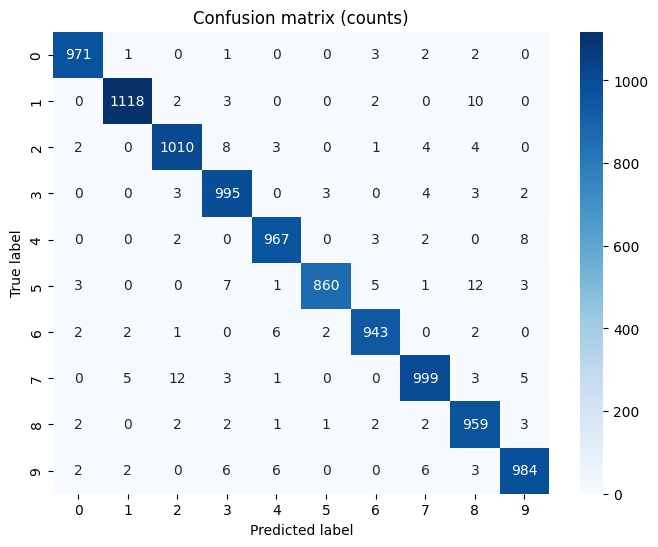

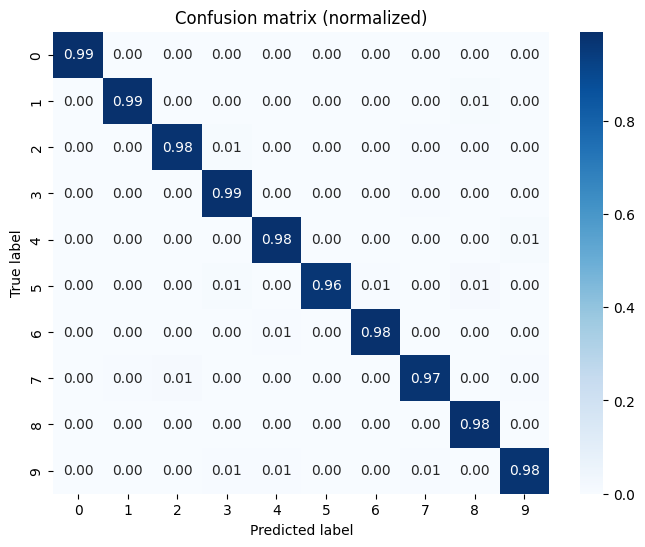

Digit 0: 99.08%
Digit 1: 98.50%
Digit 2: 97.87%
Digit 3: 98.51%
Digit 4: 98.47%
Digit 5: 96.41%
Digit 6: 98.43%
Digit 7: 97.18%
Digit 8: 98.46%
Digit 9: 97.52%


In [ ]:
#(c) Confusion matrix & class-wise performance

import seaborn as sns

#choose model to analyze
model_to_analyze = best_model

#predictions
probs = model_to_analyze.predict(x_test)
y_pred = np.argmax(probs, axis=1)
y_true = np.argmax(y_test, axis=1)

#confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
print("Classification report:\n", classification_report(y_true, y_pred, digits=4))

#plot counts
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label"); plt.ylabel("True label")
plt.title("Confusion matrix (counts)"); plt.show()

#plot normalized
plt.figure(figsize=(8,6))
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted label");plt.ylabel("True label")
plt.title("Confusion matrix (normalized)"); plt.show()

#per-class accuracy
per_class_acc = np.diag(cm) / cm.sum(axis=1)
for digit, acc in enumerate(per_class_acc):
  print(f"Digit {digit}: {acc*100:.2f}%")

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Plot the loss and accuracy graphs

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')